# IPL 2019 Batting Partnerships Analysis

# Introduction
The Indian Premier League (IPL) 2019 season showcased numerous batting partnerships that played crucial roles in team performances. This analysis focuses on examining the batting partnerships data to understand patterns, identify successful combinations, and analyze the distribution of partnership scores throughout the tournament.

# Objectives

* To identify and rank the most successful batting partnerships in IPL 2019
* To analyze the distribution pattern of partnership runs
* To examine the role of different batting positions in partnership success
* To understand the contribution of regular batting pairs to team performance

<ipython-input-5-9d692d4a2d0f>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_10.values,



Top 10 Partnerships by Total Runs:
--------------------------------------------------
DA Warner & JM Bairstow: 758 runs
Q de Kock & RG Sharma: 553 runs
PP Shaw & S Dhawan: 419 runs
S Dhawan & SS Iyer: 361 runs
F du Plessis & SR Watson: 334 runs
DA Warner & MK Pandey: 321 runs
AT Rayudu & MS Dhoni: 315 runs
HH Pandya & KA Pollard: 284 runs
F du Plessis & SK Raina: 279 runs
Q de Kock & SA Yadav: 235 runs

Team-wise Partnership Analysis:
--------------------------------------------------

Chennai Super Kings:
Average partnership: 23.00 runs
Highest partnership: 120 runs
Number of partnerships: 102

Delhi Capitals:
Average partnership: 20.15 runs
Highest partnership: 102 runs
Number of partnerships: 120

Mumbai Indians:
Average partnership: 23.87 runs
Highest partnership: 96 runs
Number of partnerships: 107

Sunrisers Hyderabad:
Average partnership: 24.68 runs
Highest partnership: 184 runs
Number of partnerships: 95


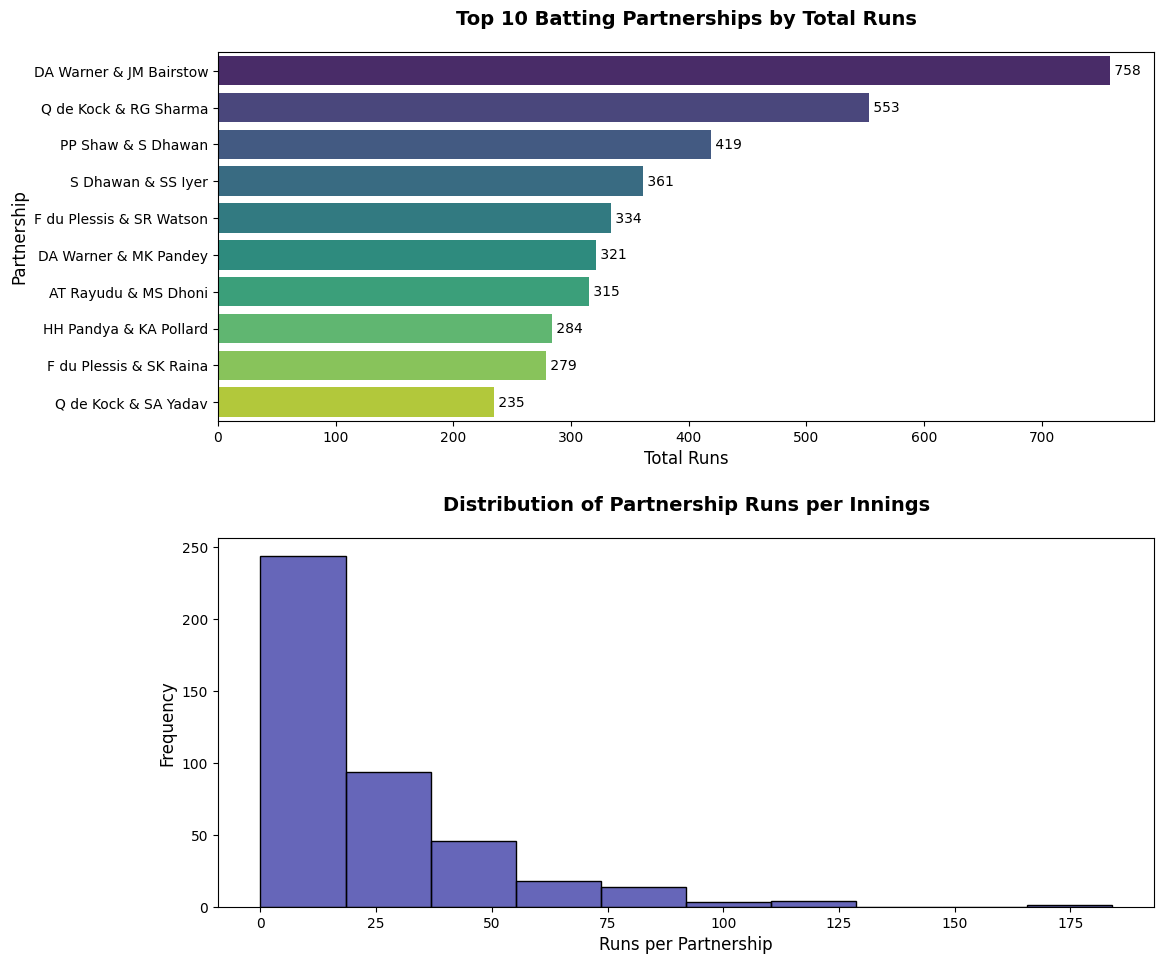

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame from the complete data
data = pd.read_csv('/content/drive/MyDrive/Infotact Internship/ipl_batting_partnerships.csv')

def analyze_batting_partnerships(data):
    # Calculate total partnership runs for each pair
    data['partnership_runs'] = data['score_1'] + data['score_2']

    # Group by player pairs (regardless of order)
    partnerships = []
    for idx, row in data.iterrows():
        # Sort player names to treat (A,B) same as (B,A)
        players = sorted([row['player_1'], row['player_2']])
        partnerships.append({
            'team': row['team'],
            'player_pair': f"{players[0]} & {players[1]}",
            'runs': row['partnership_runs'],
            'single_partnership_runs': row['partnership_runs']
        })

    partnership_df = pd.DataFrame(partnerships)

    # Aggregate total runs for each partnership
    partnership_totals = partnership_df.groupby('player_pair')['runs'].sum().sort_values(ascending=False)

    # Create visualizations
    fig = plt.figure(figsize=(15, 12))

    import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame from the complete data

def analyze_batting_partnerships(data):
    # Calculate total partnership runs for each pair
    data['partnership_runs'] = data['score_1'] + data['score_2']

    # Group by player pairs (regardless of order)
    partnerships = []
    for idx, row in data.iterrows():
        # Sort player names to treat (A,B) same as (B,A)
        players = sorted([row['player_1'], row['player_2']])
        partnerships.append({
            'team': row['team'],
            'player_pair': f"{players[0]} & {players[1]}",
            'runs': row['partnership_runs'],
            'single_partnership_runs': row['partnership_runs']
        })

    partnership_df = pd.DataFrame(partnerships)

    # Aggregate total runs for each partnership
    partnership_totals = partnership_df.groupby('player_pair')['runs'].sum().sort_values(ascending=False)

    # Create visualizations
    fig = plt.figure(figsize=(12, 10))

    # Plot 1: Top 10 Partnerships Bar Plot
    plt.subplot(2, 1, 1)
    top_10 = partnership_totals.head(10)
    bars = sns.barplot(x=top_10.values,
                      y=top_10.index,
                      palette='viridis')

    # Improve formatting of the first plot
    plt.title('Top 10 Batting Partnerships by Total Runs', pad=20, size=14, fontweight='bold')
    plt.xlabel('Total Runs', size=12)
    plt.ylabel('Partnership', size=12)

    # Adjust y-axis labels for better readability
    plt.yticks(fontsize=10)

    # Add value labels on the bars
    for i, v in enumerate(top_10.values):
        bars.text(v, i, f' {int(v)}', va='center', fontsize=10)

    # Plot 2: Distribution of Partnership Runs
    plt.subplot(2, 1, 2)
    sns.histplot(data=partnership_df, x='single_partnership_runs', bins=10,
                 color='darkblue', alpha=0.6)
    plt.title('Distribution of Partnership Runs per Innings', pad=20, size=14, fontweight='bold')
    plt.xlabel('Runs per Partnership', size=12)
    plt.ylabel('Frequency', size=12)

    # Adjust layout to prevent overlap
    plt.tight_layout(pad=2.0)

    # Print summary statistics
    print("\nTop 10 Partnerships by Total Runs:")
    print("-" * 50)
    for pair, runs in partnership_totals.head(10).items():
        print(f"{pair}: {runs:.0f} runs")

    # Team-wise analysis
    print("\nTeam-wise Partnership Analysis:")
    print("-" * 50)
    team_stats = data.groupby('team')['partnership_runs'].agg(['mean', 'max', 'count'])
    for team, stats in team_stats.iterrows():
        print(f"\n{team}:")
        print(f"Average partnership: {stats['mean']:.2f} runs")
        print(f"Highest partnership: {stats['max']:.0f} runs")
        print(f"Number of partnerships: {stats['count']:.0f}")

    plt.show()

# Run the analysis
analyze_batting_partnerships(data)

**Top Partnership Analysis:**


* DA Warner & JM Bairstow are the most successful pair with 758 runs, highlighting an exceptional opening partnership
* Q de Kock & RG Sharma follow with 553 runs, showing strong opening combination for Mumbai Indians
* There's a clear top tier of three partnerships (Warner-Bairstow, de Kock-Sharma, Shaw-Dhawan) all scoring above 400 runs
* The gap between the best (758) and 10th best (235) partnership is significant (523 runs)


**Partner Distribution:**


Multiple players appear in multiple partnerships:

* DA Warner appears twice (with Bairstow and Pandey)
* Q de Kock appears twice (with Sharma and Yadav)
* F du Plessis appears twice (with Watson and Raina)
* S Dhawan appears twice (with Shaw and Iyer)




**Partnership Types:**


Opening Partnerships dominate the top spots:

* Warner-Bairstow
* de Kock-Sharma
* Shaw-Dhawan


**Middle-order partnerships also feature:**

* Pandya-Pollard
* Rayudu-Dhoni
* Dhawan-Iyer




**Distribution Analysis (From Histogram):**


* The histogram shows a heavily right-skewed distribution
* Most partnerships score between 0-25 runs (highest frequency bar)
* There's a sharp decline in frequency as run totals increase
* Very few partnerships score above 100 runs per innings
* The distribution suggests that high-scoring partnerships are rare events


**Key Observations:**


***Opening pairs tend to accumulate the most runs, likely due to:***

1. Facing newer ball
2. Better batting conditions
3.  More opportunities to bat full overs


* Teams with multiple entries (like Warner's partnerships) suggest strong batting lineup depth
* The presence of middle-order partnerships (like Pandya-Pollard) shows the importance of finish capabilities
* There's a good mix of aggressive (Warner-Bairstow) and stable (du Plessis-Watson) partnerships in the top 10

# Conclusion
The IPL 2019 batting partnerships analysis reveals the dominance of opening pairs, particularly the Warner-Bairstow combination. The data suggests that while consistent high-scoring partnerships were rare, certain combinations proved exceptionally successful. Opening partnerships played a crucial role in team success, though the presence of strong middle-order partnerships highlighted the importance of batting depth. The analysis also emphasizes how certain players could maintain effectiveness with multiple partners, showcasing their adaptability in different batting positions and with different batting styles.

The distribution pattern of partnership scores indicates the challenging nature of building large partnerships in T20 cricket, with most partnerships scoring under 25 runs. This underscores the exceptional nature of the top-performing partnerships and their value to their respective teams in IPL 2019.